## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
# your code here
data = pd.read_csv('german_credit.csv')
display(data.head())
display(data.tail())
display(data.shape)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


(1000, 21)

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [3]:
data.sample(10)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
877,no checking account,48,no credits taken/all credits paid back duly,furniture/equipment,6758,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,female : non-single or male : single,none,...,building soc. savings agr./life insurance,31,none,rent,1,skilled employee/official,0 to 2,yes (under customer name),no,bad
281,0<= ... < 200 DM,12,no credits taken/all credits paid back duly,car (used),2251,unknown/no savings account,1 <= ... < 4 yrs,>= 35,female : non-single or male : single,none,...,building soc. savings agr./life insurance,46,none,rent,1,unskilled - resident,0 to 2,no,no,good
601,... >= 200 DM / salary for at least 1 year,24,all credits at this bank paid back duly,car (used),2028,unknown/no savings account,4 <= ... < 7 yrs,25 <= ... < 35,male : married/widowed,none,...,car or other,30,none,rent,2-3,unskilled - resident,0 to 2,no,no,good
128,... >= 200 DM / salary for at least 1 year,18,no credits taken/all credits paid back duly,others,1820,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,female : single,none,...,car or other,30,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,good
106,... >= 200 DM / salary for at least 1 year,12,all credits at this bank paid back duly,retraining,1412,unknown/no savings account,1 <= ... < 4 yrs,< 20,female : non-single or male : single,guarantor,...,unknown / no property,29,none,rent,2-3,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,good
692,... < 0 DM,6,no credits taken/all credits paid back duly,domestic appliances,454,unknown/no savings account,< 1 yr,20 <= ... < 25,female : single,none,...,car or other,22,none,rent,1,unskilled - resident,0 to 2,no,no,good
638,no checking account,20,all credits at this bank paid back duly,car (used),4272,unknown/no savings account,>= 7 yrs,>= 35,female : non-single or male : single,none,...,car or other,24,none,rent,2-3,skilled employee/official,0 to 2,no,no,good
213,0<= ... < 200 DM,6,all credits at this bank paid back duly,others,1299,unknown/no savings account,1 <= ... < 4 yrs,>= 35,male : married/widowed,none,...,unknown / no property,74,none,rent,4-5,unemployed/unskilled - non-resident,3 or more,no,yes,good
10,no checking account,11,all credits at this bank paid back duly,others,3905,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
328,... >= 200 DM / salary for at least 1 year,18,no credits taken/all credits paid back duly,others,2662,... >= 1000 DM,4 <= ... < 7 yrs,< 20,male : married/widowed,none,...,car or other,32,none,rent,1,skilled employee/official,0 to 2,no,yes,good


In [4]:
print(data.isnull().sum().sum())
print('Пропусков нет')
quantitative_features = data.select_dtypes(include='int64').columns
binary_features = data.nunique()[data.nunique() == 2].index
ordinal_features = ['status', 'savings', 'employment_duration', 'installment_rate', 'present_residence', 'number_credits']
categorical_features = list(set(data.columns) - set(quantitative_features) - set(binary_features) - set(ordinal_features))

print("\nКоличественные признаки:")
print(quantitative_features)
print("\nБинарные признаки:")
print(binary_features)
print("\nПорядковые признаки:")
print(ordinal_features)
print("\nКатегориальные признаки:")
print(categorical_features)

0
Пропусков нет

Количественные признаки:
Index(['duration', 'amount', 'age'], dtype='object')

Бинарные признаки:
Index(['people_liable', 'telephone', 'foreign_worker', 'credit_risk'], dtype='object')

Порядковые признаки:
['status', 'savings', 'employment_duration', 'installment_rate', 'present_residence', 'number_credits']

Категориальные признаки:
['other_installment_plans', 'personal_status_sex', 'other_debtors', 'credit_history', 'purpose', 'housing', 'job', 'property']


### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [5]:
data.groupby('purpose')['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [6]:
print(len(data[(data['age'] < 30) & (data['housing'] == 'rent')]) / len(data[data['age'] < 30]))
print(len(data[(data['age'] > 40) & (data['housing'] == 'rent')]) / len(data[data['age'] > 40]))


0.6666666666666666
0.6801470588235294


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [7]:
sum((data['foreign_worker'] == 'yes') & (data['number_credits'].apply(lambda x: int(x[-1]) > 3)))

1

### Задание 6 (1 балл)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

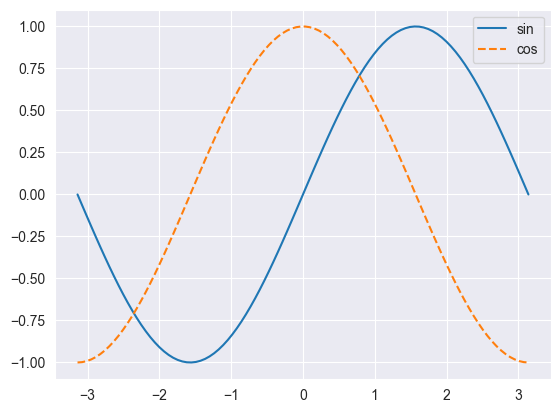

In [9]:
plt.plot(np.linspace(-np.pi, np.pi, 100), np.sin(np.linspace(-np.pi, np.pi, 100)))
plt.plot(np.linspace(-np.pi, np.pi, 100), np.cos(np.linspace(-np.pi, np.pi, 100)), '--')
plt.legend(['sin', 'cos'])

plt.show()


### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

Text(0.5, 1.0, 'Гистограммы размеров счетов для положительных и отрицательных кейсов')

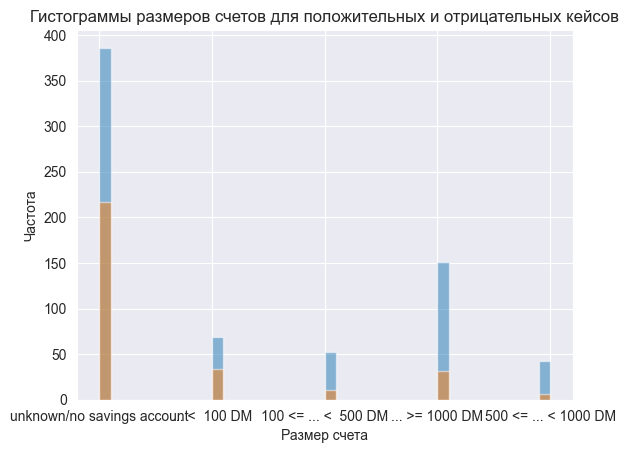

In [10]:
good = data[data['credit_risk'] == 'good']
bad = data[data['credit_risk'] == 'bad']
# plt.figure(figsize=(20, 10))
plt.hist(good['savings'], bins=40, alpha=0.5, label='Положительные кейсы')
plt.hist(bad['savings'], bins=40, alpha=0.5, label='Отрицательные кейсы')
plt.xlabel('Размер счета')
plt.ylabel('Частота')
plt.title('Гистограммы размеров счетов для положительных и отрицательных кейсов')

### Задание 8  (0.5 балла)

In [11]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

<AxesSubplot: xlabel='savings', ylabel='Count'>

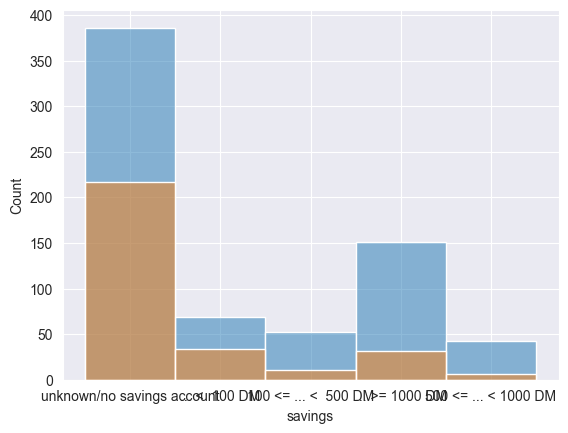

In [12]:
sns.histplot(good['savings'], alpha=0.5)
sns.histplot(bad['savings'], alpha=0.5)

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')


<AxesSubplot: xlabel='age', ylabel='savings'>

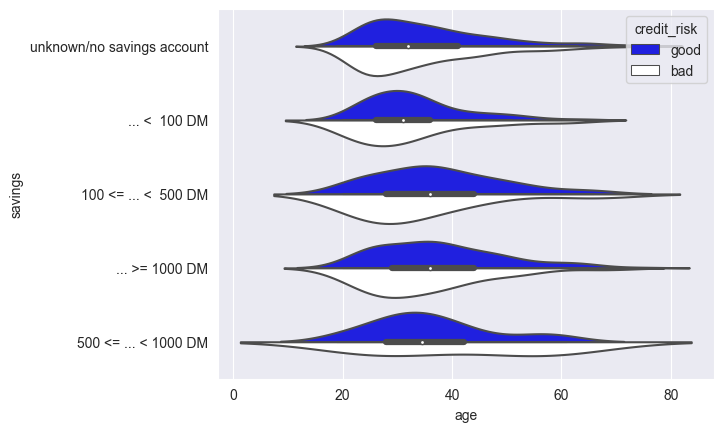

In [13]:
print(data.columns)
sns.violinplot(data=data, x='age',y='savings', hue='credit_risk', kde=True, split=True, palette={'good': 'b', 'bad': 'w'})
# sns.set(rc={'figure.figsize':(15, 8)})

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

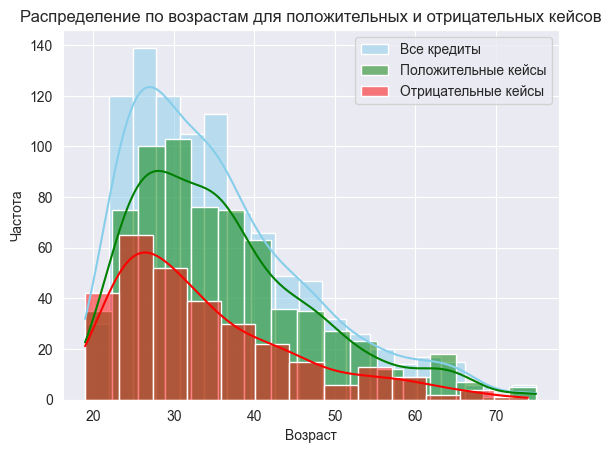

In [14]:
sns.histplot(data['age'], kde=True, color='skyblue', label='Все кредиты')

sns.histplot(data[data['credit_risk'] == 'good']['age'], kde=True, color='green', label='Положительные кейсы')

sns.histplot(data[data['credit_risk'] == 'bad']['age'], kde=True, color='red', label='Отрицательные кейсы')

plt.title('Распределение по возрастам для положительных и отрицательных кейсов')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.legend()

plt.show()

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

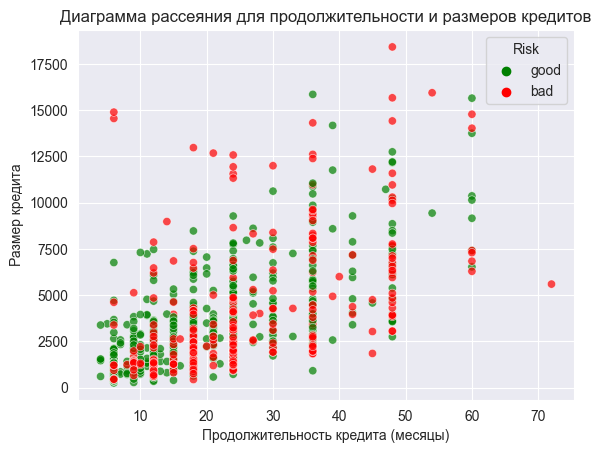

In [15]:
# your code her
sns.scatterplot(x='duration', y='amount', data=data, hue='credit_risk', palette={'good': 'green', 'bad': 'red'}, alpha=0.7)

plt.title('Диаграмма рассеяния для продолжительности и размеров кредитов')
plt.xlabel('Продолжительность кредита (месяцы)')
plt.ylabel('Размер кредита')
plt.legend(title='Risk')

plt.show()

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

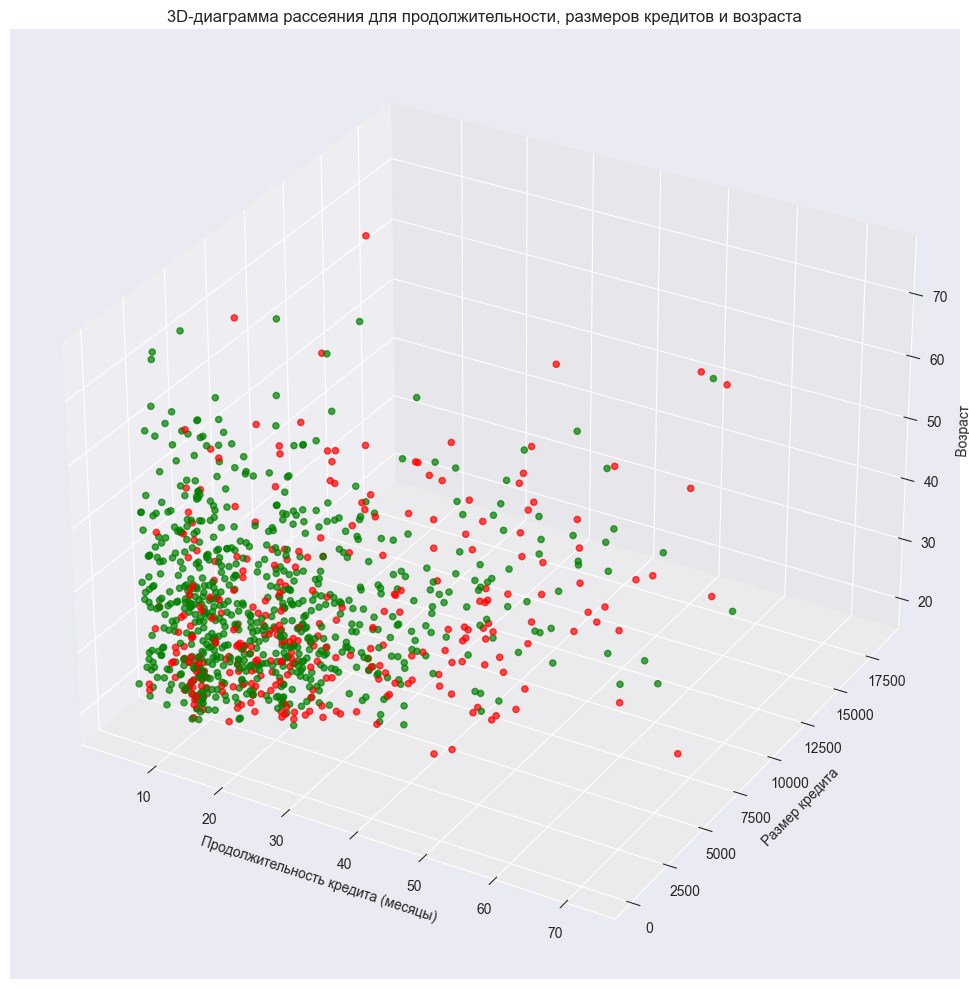

In [16]:
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(data['duration'], data['amount'], data['age'], c=data['credit_risk'].map({'good': 'green', 'bad': 'red'}), alpha=0.7)

ax.set_title('3D-диаграмма рассеяния для продолжительности, размеров кредитов и возраста')
ax.set_xlabel('Продолжительность кредита (месяцы)')
ax.set_ylabel('Размер кредита')
ax.set_zlabel('Возраст')


plt.tight_layout()
plt.show()

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [17]:
from sklearn.preprocessing import OneHotEncoder

for feature in list(ordinal_features) + list(binary_features):
    unique_values = data[feature].unique()
    mapping = {value: index for index, value in enumerate(unique_values)}
    data[feature] = data[feature].map(mapping)
    
encoder = OneHotEncoder(sparse=False)
onehot_encoded = encoder.fit_transform(data[categorical_features])
data_encoded = pd.concat([data, pd.DataFrame(onehot_encoded, columns=encoder.get_feature_names_out(categorical_features))], axis=1)


C:\Users\Амир\PROGRAMMING\Python Interpriter 3.9\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [18]:
data_encoded = data_encoded.drop(list(categorical_features), axis=1)

In [19]:
data = data_encoded

In [20]:
data

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,...,housing_own,housing_rent,job_manager/self-empl./highly qualif. employee,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident,property_building soc. savings agr./life insurance,property_car or other,property_real estate,property_unknown / no property
0,0,18,1049,0,0,0,0,21,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,9,2799,0,1,1,1,36,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,12,841,1,2,1,0,23,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0,12,2122,0,1,2,1,39,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,12,2171,0,1,0,0,38,1,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,24,1987,0,1,1,0,21,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
996,0,24,2303,0,4,0,3,45,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
997,2,21,12680,3,4,0,0,30,0,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
998,1,12,6468,3,3,1,3,52,0,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [21]:
data.sample(20)


,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,...,housing_own,housing_rent,job_manager/self-empl./highly qualif. employee,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident,property_building soc. savings agr./life insurance,property_car or other,property_real estate,property_unknown / no property
884,1,15,2631,1,1,1,0,28,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
636,0,12,2246,0,4,2,2,60,1,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
333,2,22,1283,3,2,0,0,25,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
399,1,12,6078,0,2,1,1,32,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
284,0,21,3357,4,0,0,1,29,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
754,1,6,14555,3,3,3,1,23,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
861,0,48,4308,0,0,2,0,24,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
869,1,24,1355,0,0,2,0,25,0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
856,0,24,3349,2,0,0,0,30,0,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
767,2,18,1530,0,1,2,1,32,1,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


def predict(Xtest: np.array) -> np.array:
    predictions = np.array([1 if sum(features) - 6 * features[0] + 2 * features[1] > 0 else 0 for features in Xtest])
    return predictions




X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Используйте X_train и y_train на ваше усмотрение
# your code here
accuracy_score(y_test, predict(X_test))

C:\Users\Амир\AppData\Local\Temp\ipykernel_16788\943659868.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop('credit_risk', 1).values


0.608